In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with DCS-3 (Chat Group).txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

24/03/2024, 5:38 am - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
14/10/2020, 11:05 am - Mansoor Fellow created group "DCS-3 (Chat Group)"
24/03/2024, 4:26 am - Mansoor Fellow added you
25/03/2024, 7:23 pm - Mansoor Fellow added Hamza Fellow
04/04/2024, 7:17 pm - Wajid Fellow: House available for rent location shadab colony.
04/04/2024, 7:27 pm - Hanzala Fellow: details doo
04/04/2024, 7:29 pm - Wajid Fellow: Detail kya chhahiya bro
04/04/2024, 7:33 pm - Hanzala Fellow: kitny marly ka haii.. kitny room hain.. rent ktna
04/04/2024, 7:33 pm - Hanzala Fellow: porch hai ?
04/04/2024, 7:37 pm - Wajid Fellow: 7.5 marly jaga 
3 room 
2 washrooms
1 kitchen
Or shn nicha ha 
Or chath pa 1 room with attached washroom and kitchen or kafi shn ha.
Rent 23k <This message was edited>
04/04/2024, 7:37 pm - Hanzala Fellow: okay 🩷
04/04/2024, 7:38 pm - Noman Rajput: It's too much 🫤
04/04/2024, 7:39 pm - Hanzala Fellow: point
04/04/

In [5]:
print(type(data))

<class 'str'>


In [6]:
pattern = r"\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s?[ap]m\s-\s"


In [7]:
messages = re.split(pattern,data)[1:]
print(messages)

['Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n', 'Mansoor Fellow created group "DCS-3 (Chat Group)"\n', 'Mansoor Fellow added you\n', 'Mansoor Fellow added Hamza Fellow\n', 'Wajid Fellow: House available for rent location shadab colony.\n', 'Hanzala Fellow: details doo\n', 'Wajid Fellow: Detail kya chhahiya bro\n', 'Hanzala Fellow: kitny marly ka haii.. kitny room hain.. rent ktna\n', 'Hanzala Fellow: porch hai ?\n', 'Wajid Fellow: 7.5 marly jaga \n3 room \n2 washrooms\n1 kitchen\nOr shn nicha ha \nOr chath pa 1 room with attached washroom and kitchen or kafi shn ha.\nRent 23k <This message was edited>\n', 'Hanzala Fellow: okay \U0001fa77\n', "Noman Rajput: It's too much \U0001fae4\n", 'Hanzala Fellow: point\n', 'Noman Rajput: 🙄😂\n', 'Noman Rajput: Abay thk ha rent Etna he Huna tha\n', 'Hanzala Fellow: jahaz\n', 'Noman Rajput: 😂😁\n', 'Hanzala Fellow: 15 se 18 tk thk haii.. baki road dekh k andaza hoga\n', 'Noman

In [8]:
dates = re.findall(pattern, data)
print(dates)

['24/03/2024, 5:38\u202fam - ', '14/10/2020, 11:05\u202fam - ', '24/03/2024, 4:26\u202fam - ', '25/03/2024, 7:23\u202fpm - ', '04/04/2024, 7:17\u202fpm - ', '04/04/2024, 7:27\u202fpm - ', '04/04/2024, 7:29\u202fpm - ', '04/04/2024, 7:33\u202fpm - ', '04/04/2024, 7:33\u202fpm - ', '04/04/2024, 7:37\u202fpm - ', '04/04/2024, 7:37\u202fpm - ', '04/04/2024, 7:38\u202fpm - ', '04/04/2024, 7:39\u202fpm - ', '04/04/2024, 7:39\u202fpm - ', '04/04/2024, 7:39\u202fpm - ', '04/04/2024, 7:40\u202fpm - ', '04/04/2024, 7:40\u202fpm - ', '04/04/2024, 7:40\u202fpm - ', '04/04/2024, 7:40\u202fpm - ', '04/04/2024, 7:41\u202fpm - ', '04/04/2024, 7:41\u202fpm - ', '04/04/2024, 7:41\u202fpm - ', '04/04/2024, 7:42\u202fpm - ', '04/04/2024, 7:42\u202fpm - ', '04/04/2024, 7:42\u202fpm - ', '04/04/2024, 7:42\u202fpm - ', '04/04/2024, 7:42\u202fpm - ', '04/04/2024, 7:43\u202fpm - ', '04/04/2024, 8:03\u202fpm - ', '04/04/2024, 8:03\u202fpm - ', '04/04/2024, 8:03\u202fpm - ', '04/04/2024, 8:03\u202fpm - ', '04/04

In [9]:
import pandas as pd
dates = [d.replace('\u202f', ' ').replace('\u00a0', ' ') for d in dates]
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M %p - ')
df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()


,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2024-03-24 05:38:00
1,"Mansoor Fellow created group ""DCS-3 (Chat Grou...",2020-10-14 11:05:00
2,Mansoor Fellow added you\n,2024-03-24 04:26:00
3,Mansoor Fellow added Hamza Fellow\n,2024-03-25 19:23:00
4,Wajid Fellow: House available for rent locatio...,2024-04-04 19:17:00


In [10]:
df.shape

(1039, 2)

In [11]:
# separate users and messages
users = []
messages = []

for message in df['user_message']:
    entry = re.split(r'([\w\W]+?):\s', message)
    
    if len(entry) > 1:  # if there is a username
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()



,date,user,message
0,2024-03-24 05:38:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2020-10-14 11:05:00,group_notification,"Mansoor Fellow created group ""DCS-3 (Chat Grou..."
2,2024-03-24 04:26:00,group_notification,Mansoor Fellow added you\n
3,2024-03-25 19:23:00,group_notification,Mansoor Fellow added Hamza Fellow\n
4,2024-04-04 19:17:00,Wajid Fellow,House available for rent location shadab colon...


In [12]:
df['year'] = df['date'].dt.year

In [13]:
df.head()

,date,user,message,year
0,2024-03-24 05:38:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024
1,2020-10-14 11:05:00,group_notification,"Mansoor Fellow created group ""DCS-3 (Chat Grou...",2020
2,2024-03-24 04:26:00,group_notification,Mansoor Fellow added you\n,2024
3,2024-03-25 19:23:00,group_notification,Mansoor Fellow added Hamza Fellow\n,2024
4,2024-04-04 19:17:00,Wajid Fellow,House available for rent location shadab colon...,2024


In [14]:
df['month'] = df['date'].dt.month_name()

In [15]:
df.head()

,date,user,message,year,month
0,2024-03-24 05:38:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,March
1,2020-10-14 11:05:00,group_notification,"Mansoor Fellow created group ""DCS-3 (Chat Grou...",2020,October
2,2024-03-24 04:26:00,group_notification,Mansoor Fellow added you\n,2024,March
3,2024-03-25 19:23:00,group_notification,Mansoor Fellow added Hamza Fellow\n,2024,March
4,2024-04-04 19:17:00,Wajid Fellow,House available for rent location shadab colon...,2024,April


In [16]:
df['day'] = df['date'].dt.day

In [17]:
df.head()

,date,user,message,year,month,day
0,2024-03-24 05:38:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,March,24
1,2020-10-14 11:05:00,group_notification,"Mansoor Fellow created group ""DCS-3 (Chat Grou...",2020,October,14
2,2024-03-24 04:26:00,group_notification,Mansoor Fellow added you\n,2024,March,24
3,2024-03-25 19:23:00,group_notification,Mansoor Fellow added Hamza Fellow\n,2024,March,25
4,2024-04-04 19:17:00,Wajid Fellow,House available for rent location shadab colon...,2024,April,4


In [18]:
df['hour'] = df['date'].dt.hour

In [19]:
df['minute'] = df['date'].dt.minute

In [20]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2024-03-24 05:38:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,March,24,5,38
1,2020-10-14 11:05:00,group_notification,"Mansoor Fellow created group ""DCS-3 (Chat Grou...",2020,October,14,11,5
2,2024-03-24 04:26:00,group_notification,Mansoor Fellow added you\n,2024,March,24,4,26
3,2024-03-25 19:23:00,group_notification,Mansoor Fellow added Hamza Fellow\n,2024,March,25,19,23
4,2024-04-04 19:17:00,Wajid Fellow,House available for rent location shadab colon...,2024,April,4,19,17


In [21]:
df[df['user'] == 'Wajid Fellow'].shape

(127, 8)

In [22]:
words = []
for message in df['message']:
    words.extend(message.split())

In [23]:
len(words)

5302

In [24]:
from urlextract import URLExtract

extractor = URLExtract()
text = "Let's www.gmail.com have URL stackoverflow.com as an example google.com, https://facebook.com, ftp://url.in ."
urls = extractor.find_urls(text)
print(urls)


['www.gmail.com', 'stackoverflow.com', 'google.com', 'https://facebook.com', 'ftp://url.in']


In [25]:
!pip install urlextract


In [26]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [27]:
len(links)

8

In [28]:
x = df['user'].value_counts().head()

In [29]:
import matplotlib.pyplot as plt


In [30]:
name = x.index
count = x.values

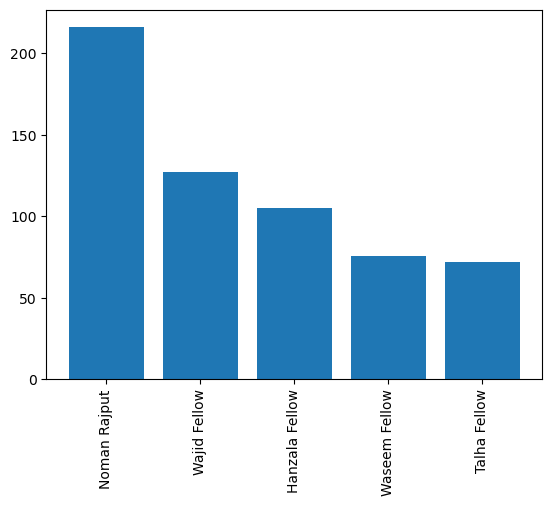

In [31]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,Noman Rajput,20.79
1,Wajid Fellow,12.22
2,Hanzala Fellow,10.11
3,Waseem Fellow,7.31
4,Talha Fellow,6.93
5,Rana Arbaz Fellow,6.54
6,Saad Daiem Fellow,5.49
7,Abdullah Fellow,4.33
8,Kashif Fellow,3.56
9,Uzair Fellow 2,3.08


In [33]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [34]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [35]:
import os
print(os.getcwd())


C:\Users\Administrator\machine learning project 2


In [36]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [37]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,😂,33
1,haye,28
2,kro,22
3,yar,21
4,badi,20
5,bado,19
6,kia,18
7,peep,16
8,mam,15
9,gya,13


In [38]:
# remove group messages
# remove media omitted message
# remove stop words

In [39]:
!pip install emoji

In [40]:
import emoji

In [41]:
emojis = []
for message in df['message']:
     emojis.extend([c for c in message if emoji.is_emoji(c)])

In [42]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,146
1,🤣,39
2,🙄,16
3,❤,16
4,😡,15
...,...,...
90,👍,1
91,😇,1
92,🖤,1
93,🥀,1


In [43]:
df['month_num'] = df['date'].dt.month

In [44]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [45]:
timeline

,year,month_num,month,message
0,2020,10,October,1
1,2024,3,March,3
2,2024,4,April,101
3,2024,5,May,82
4,2024,6,June,634
5,2024,7,July,71
6,2024,8,August,28
7,2024,9,September,51
8,2024,10,October,44
9,2024,11,November,5


In [46]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))
    

In [47]:
timeline['time'] = time

In [48]:
timeline

,year,month_num,month,message,time
0,2020,10,October,1,October-2020
1,2024,3,March,3,March-2024
2,2024,4,April,101,April-2024
3,2024,5,May,82,May-2024
4,2024,6,June,634,June-2024
5,2024,7,July,71,July-2024
6,2024,8,August,28,August-2024
7,2024,9,September,51,September-2024
8,2024,10,October,44,October-2024
9,2024,11,November,5,November-2024


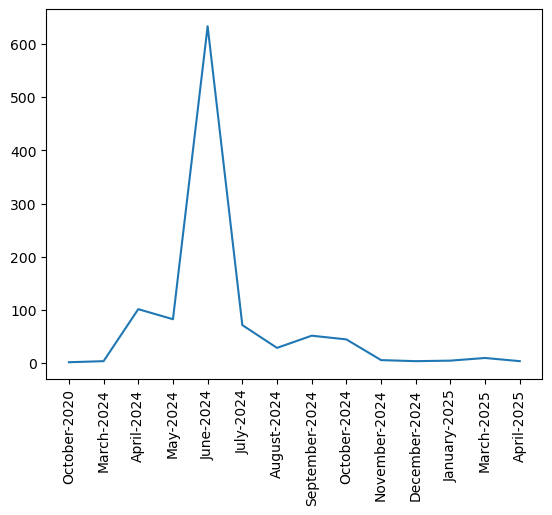

In [49]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
df['only_date'] = df['date'].dt.date

In [51]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

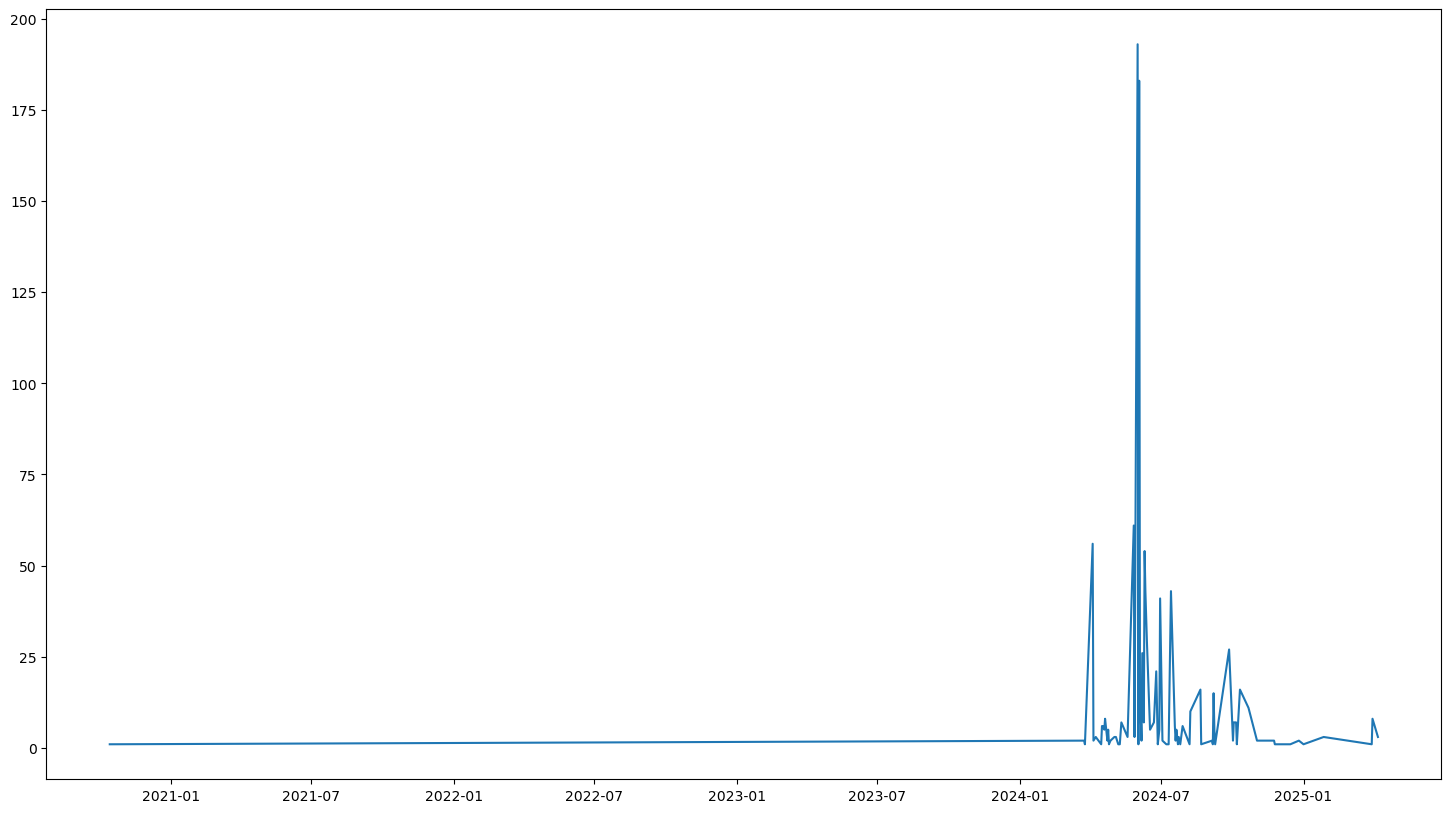

In [52]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [53]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2024-03-24 05:38:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,March,24,5,38,3,2024-03-24
1,2020-10-14 11:05:00,group_notification,"Mansoor Fellow created group ""DCS-3 (Chat Grou...",2020,October,14,11,5,10,2020-10-14
2,2024-03-24 04:26:00,group_notification,Mansoor Fellow added you\n,2024,March,24,4,26,3,2024-03-24
3,2024-03-25 19:23:00,group_notification,Mansoor Fellow added Hamza Fellow\n,2024,March,25,19,23,3,2024-03-25
4,2024-04-04 19:17:00,Wajid Fellow,House available for rent location shadab colon...,2024,April,4,19,17,4,2024-04-04


In [54]:
df['day_name'] = df['date'].dt.day_name()

In [55]:
df['day_name'].value_counts()

Monday       336
Saturday     244
Sunday       118
Thursday     116
Tuesday      104
Friday        84
Wednesday     37
Name: day_name, dtype: int64

In [56]:
df['month'].value_counts()

June         634
April        104
May           82
July          71
September     51
October       45
August        28
March         12
November       5
January        4
December       3
Name: month, dtype: int64

In [57]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2024-03-24 05:38:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,March,24,5,38,3,2024-03-24,Sunday
1,2020-10-14 11:05:00,group_notification,"Mansoor Fellow created group ""DCS-3 (Chat Grou...",2020,October,14,11,5,10,2020-10-14,Wednesday
2,2024-03-24 04:26:00,group_notification,Mansoor Fellow added you\n,2024,March,24,4,26,3,2024-03-24,Sunday
3,2024-03-25 19:23:00,group_notification,Mansoor Fellow added Hamza Fellow\n,2024,March,25,19,23,3,2024-03-25,Monday
4,2024-04-04 19:17:00,Wajid Fellow,House available for rent location shadab colon...,2024,April,4,19,17,4,2024-04-04,Thursday


In [58]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour ==0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [59]:
df['period'] = period

In [60]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
912,2024-08-21 13:01:00,Rana Arbaz Fellow,Mashallah\n,2024,August,21,13,1,8,2024-08-21,Wednesday,13-14
977,2024-10-03 15:13:00,Saad Daiem Fellow,Acha sai\n,2024,October,3,15,13,10,2024-10-03,Thursday,15-16
460,2024-06-03 16:18:00,Noman Rajput,ni tu add kra or sorry krai sbb k smny\n,2024,June,3,16,18,6,2024-06-03,Monday,16-17
974,2024-10-03 13:55:00,Rana Arbaz Fellow,Hn meri rhti ha abhi\n,2024,October,3,13,55,10,2024-10-03,Thursday,13-14
522,2024-06-03 17:16:00,Wajid Fellow,Start kro bt\n,2024,June,3,17,16,6,2024-06-03,Monday,17-18


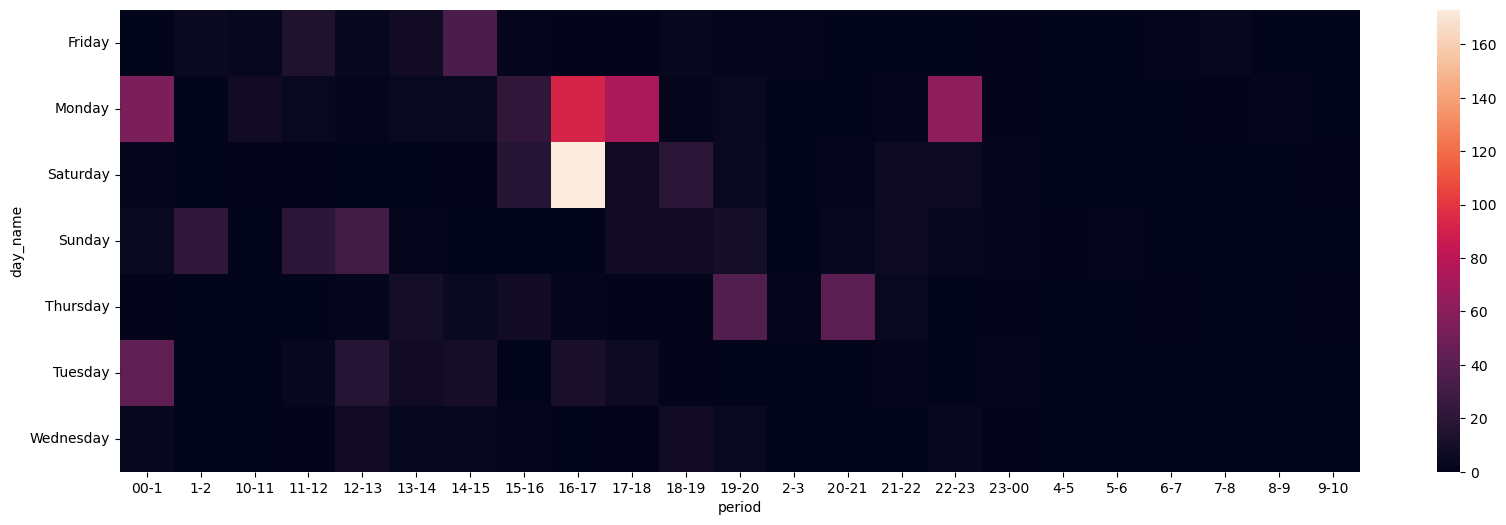

In [61]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()